In [3]:
import pandas as pd

# Upload your cleaned dataset
from google.colab import files
uploaded = files.upload()

# Read the CSV
df = pd.read_csv('ev_specs_cleaned.csv')
df.head()


Saving ev_specs_cleaned.csv to ev_specs_cleaned.csv


,battery,car_name,car_name_link,efficiency,fast_charge,price.de.,range,top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670,59017,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700,46220,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370,44625,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630,39990,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780,55220,505,201,4.4


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
df = pd.read_csv('ev_specs_cleaned.csv')
df.head()


,battery,car_name,car_name_link,efficiency,fast_charge,price.de.,range,top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670,59017,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700,46220,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370,44625,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630,39990,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780,55220,505,201,4.4


In [7]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   battery               360 non-null    float64
 1   car_name              360 non-null    object 
 2   car_name_link         360 non-null    object 
 3   efficiency            360 non-null    int64  
 4   fast_charge           360 non-null    int64  
 5   price.de.             360 non-null    int64  
 6   range                 360 non-null    int64  
 7   top_speed             360 non-null    int64  
 8   acceleration..0.100.  360 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 25.4+ KB


,0
battery,0
car_name,0
car_name_link,0
efficiency,0
fast_charge,0
price.de.,0
range,0
top_speed,0
acceleration..0.100.,0


In [12]:
# show columns and a preview so we can see the real names
print("Columns:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
display(df.head())


Columns:
['battery', 'car_name', 'car_name_link', 'efficiency', 'fast_charge', 'price.de.', 'range', 'top_speed', 'acceleration..0.100.']

First 5 rows:


,battery,car_name,car_name_link,efficiency,fast_charge,price.de.,range,top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670,59017,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700,46220,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370,44625,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630,39990,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780,55220,505,201,4.4


In [13]:
# Try to auto-detect the target column name that represents driving range
candidates = ['driving_range_km','range_km','official_range_km','range (km)','range','range_km.','driving_range','rangeKm','range_in_km']
found = [c for c in df.columns if c.lower().replace(' ','').replace('_','') in [x.lower().replace(' ','').replace('_','') for x in candidates]]

if len(found)==0:
    # fallback: look for any column that contains the substring 'range' (case-insensitive)
    found = [c for c in df.columns if 'range' in c.lower()]

if len(found)==0:
    print("No obvious 'range' column found. Here are the columns again:")
    print(df.columns.tolist())
else:
    target_col = found[0]
    print("Auto-detected target column:", target_col)
    # show value stats
    print(df[target_col].describe())


Auto-detected target column: range
count    360.000000
mean     369.694444
std      107.315514
min      135.000000
25%      295.000000
50%      380.000000
75%      446.250000
max      685.000000
Name: range, dtype: float64


In [14]:
# Replace 'target_col' with the detected column name if auto-detect found one.
# If auto-detect didn't work, replace target_col = 'THE_REAL_NAME' with the exact name from df.columns list.
try:
    target_col
except NameError:
    target_col = None

if target_col is None:
    # Put your real column name here if you saw it in the previous output, for example:
    # target_col = 'Range (km)'
    raise Exception("target_col not set. Run the previous auto-detect cell or set target_col to the exact name from df.columns.")

# Drop obviously irrelevant text columns safely (errors='ignore')
df2 = df.copy()
df2 = df2.drop(['model','brand','make'], axis=1, errors='ignore')

# Convert numeric-like columns to numeric where possible
for col in df2.columns:
    df2[col] = pd.to_numeric(df2[col], errors='ignore')

# If target is not numeric, try converting
if not pd.api.types.is_numeric_dtype(df2[target_col]):
    df2[target_col] = pd.to_numeric(df2[target_col], errors='coerce')

# Drop rows where target is NaN or non-positive
df2 = df2[df2[target_col].notna()]
if pd.api.types.is_numeric_dtype(df2[target_col]):
    df2 = df2[df2[target_col] > 0]

# If any categorical columns remain, convert them to dummies
cat_cols = df2.select_dtypes(include=['object','category']).columns.tolist()
if len(cat_cols) > 0:
    df2 = pd.get_dummies(df2, columns=cat_cols, drop_first=True)

# Separate features and target
X = df2.drop(columns=[target_col])
y = df2[target_col]

print("Final shapes -> X:", X.shape, " y:", y.shape)


Final shapes -> X: (360, 715)  y: (360,)


/tmp/ipython-input-676017683.py:19: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df2[col] = pd.to_numeric(df2[col], errors='ignore')


In [15]:
# Replace 'target_col' with the detected column name if auto-detect found one.
# If auto-detect didn't work, replace target_col = 'THE_REAL_NAME' with the exact name from df.columns list.
try:
    target_col
except NameError:
    target_col = None

if target_col is None:
    # Put your real column name here if you saw it in the previous output, for example:
    # target_col = 'Range (km)'
    raise Exception("target_col not set. Run the previous auto-detect cell or set target_col to the exact name from df.columns.")

# Drop obviously irrelevant text columns safely (errors='ignore')
df2 = df.copy()
df2 = df2.drop(['model','brand','make'], axis=1, errors='ignore')

# Convert numeric-like columns to numeric where possible
for col in df2.columns:
    df2[col] = pd.to_numeric(df2[col], errors='ignore')

# If target is not numeric, try converting
if not pd.api.types.is_numeric_dtype(df2[target_col]):
    df2[target_col] = pd.to_numeric(df2[target_col], errors='coerce')

# Drop rows where target is NaN or non-positive
df2 = df2[df2[target_col].notna()]
if pd.api.types.is_numeric_dtype(df2[target_col]):
    df2 = df2[df2[target_col] > 0]

# If any categorical columns remain, convert them to dummies
cat_cols = df2.select_dtypes(include=['object','category']).columns.tolist()
if len(cat_cols) > 0:
    df2 = pd.get_dummies(df2, columns=cat_cols, drop_first=True)

# Separate features and target
X = df2.drop(columns=[target_col])
y = df2[target_col]

print("Final shapes -> X:", X.shape, " y:", y.shape)


Final shapes -> X: (360, 715)  y: (360,)


/tmp/ipython-input-676017683.py:19: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df2[col] = pd.to_numeric(df2[col], errors='ignore')


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
import numpy as np
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))


MAE: 10.861445637437287
RMSE: 15.112836721606211
R2: 0.9782784331623383


In [18]:
print(df.columns.tolist())


['battery', 'car_name', 'car_name_link', 'efficiency', 'fast_charge', 'price.de.', 'range', 'top_speed', 'acceleration..0.100.']


In [19]:
# Prepare dataframe copy
df2 = df.copy()

# Identify a target column automatically if not already set:
possible_targets = [c for c in df2.columns if 'range' in c.lower()]
print("Possible range columns found:", possible_targets)
# If the correct column is not the first one, replace target_col below with the exact name
target_col = possible_targets[0]   # change if necessary

# Drop columns that are obviously identifiers (change names if needed)
df2 = df2.drop(['model','make','brand'], axis=1, errors='ignore')

# Ensure numeric conversion where possible
for c in df2.columns:
    df2[c] = pd.to_numeric(df2[c], errors='ignore')

# Convert categorical to dummies
cat_cols = df2.select_dtypes(include=['object','category']).columns.tolist()
df2 = pd.get_dummies(df2, columns=cat_cols, drop_first=True)

# Drop rows with missing or non-positive target
df2 = df2[df2[target_col].notna()]
if pd.api.types.is_numeric_dtype(df2[target_col]):
    df2 = df2[df2[target_col] > 0]

# Final X, y
X = df2.drop(columns=[target_col])
y = df2[target_col]

print("Final shapes -> X:", X.shape, " y:", y.shape)


Possible range columns found: ['range']
Final shapes -> X: (360, 715)  y: (360,)


/tmp/ipython-input-2073974956.py:15: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df2[c] = pd.to_numeric(df2[c], errors='ignore')


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
print("LinearRegression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("LinearRegression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("LinearRegression R2:", r2_score(y_test, y_pred_lr))


LinearRegression MAE: 10.861445637437287
LinearRegression RMSE: 15.112836721606211
LinearRegression R2: 0.9782784331623383


In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("RandomForest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RandomForest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("RandomForest R2:", r2_score(y_test, y_pred_rf))


RandomForest MAE: 11.300347222222223
RandomForest RMSE: 17.55496798748624
RandomForest R2: 0.9706911180233614


In [23]:
from sklearn.model_selection import cross_val_score
# negative MAE -> convert to positive
cv_scores = -cross_val_score(rf, X, y, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
print("RandomForest CV MAE (5-fold):", cv_scores.mean(), "+/-", cv_scores.std())


RandomForest CV MAE (5-fold): 14.579166666666666 +/- 3.817502145030806


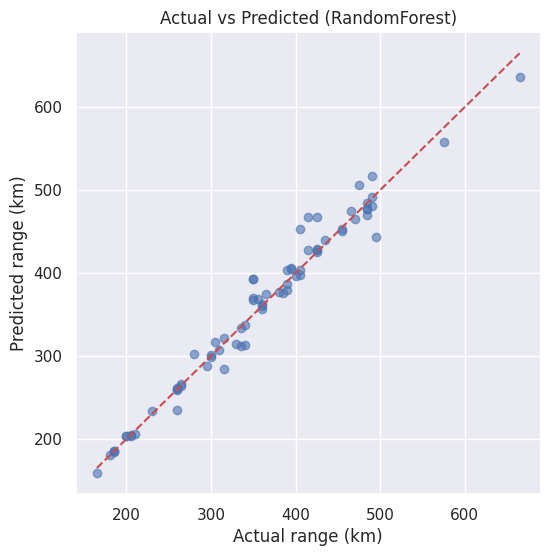

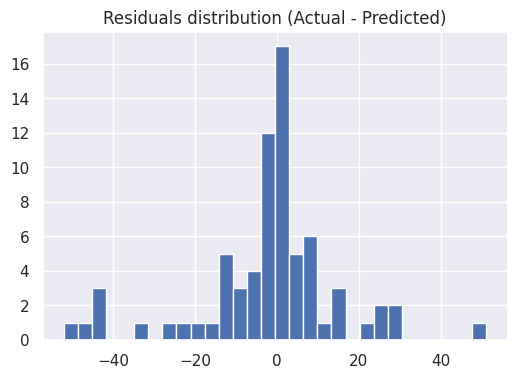

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual range (km)")
plt.ylabel("Predicted range (km)")
plt.title("Actual vs Predicted (RandomForest)")
plt.show()

# Residuals plot
res = y_test - y_pred_rf
plt.figure(figsize=(6,4))
plt.hist(res, bins=30)
plt.title("Residuals distribution (Actual - Predicted)")
plt.show()


battery                                                                               0.792144
efficiency                                                                            0.085731
fast_charge                                                                           0.052517
top_speed                                                                             0.042087
acceleration..0.100.                                                                  0.016107
price.de.                                                                             0.005044
car_name_link_https://ev-database.org/car/1316/Lucid-Air-Grand-Touring                0.000542
car_name_Tesla Model 3 Long Range Dual Motor                                          0.000137
car_name_Lucid Air Dream Edition R                                                    0.000134
car_name_link_https://ev-database.org/car/1696/Lucid-Air-Dream-Edition-R              0.000125
car_name_NIO ET5 Touring 100 kWh                  

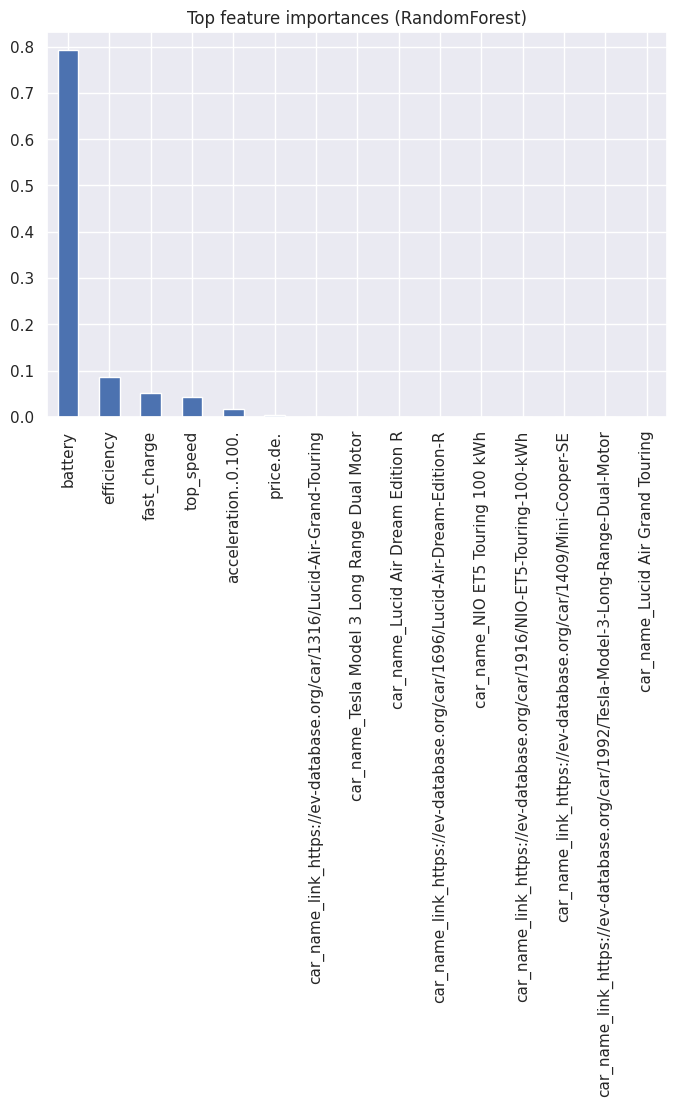

In [25]:
import pandas as pd
fi = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(fi.head(20))
plt.figure(figsize=(8,5))
fi.head(15).plot(kind='bar')
plt.title("Top feature importances (RandomForest)")
plt.show()


In [26]:
import joblib
joblib.dump(rf, 'ev_range_rf_model.pkl')
files.download('ev_range_rf_model.pkl')   # to download locally from Colab


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>